# Implementing Deutsch-Jozsa Algorithm

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler
import matplotlib.pyplot as plt

simulator = AerSimulator()

def quasi_probs_to_counts(quasi_probs, shots):
    counts = {}
    for bitstring, quasi_prob in quasi_probs.items():
        counts[bitstring] = int(round(quasi_prob * shots))
    return counts



     ┌───┐               ┌───┐          
q_0: ┤ H ├────────────■──┤ H ├──────────
     ├───┤            │  └───┘┌───┐     
q_1: ┤ H ├────────────┼────■──┤ H ├─────
     ├───┤            │    │  └───┘┌───┐
q_2: ┤ H ├────────────┼────┼────■──┤ H ├
     ├───┤┌───┐┌───┐┌─┴─┐┌─┴─┐┌─┴─┐└───┘
q_3: ┤ H ├┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─────
     └───┘└───┘└───┘└───┘└───┘└───┘     
c: 3/═══════════════════════════════════
                                        
Deutsch-Josza Algorithm:
{0: 504, 7: 520}


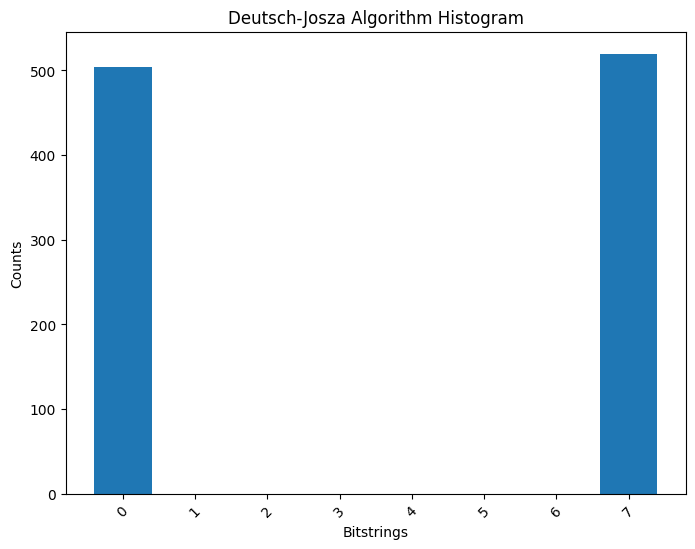

In [3]:
def deutsch_jozsa():
    n = 3  # Number of qubits
    oracle_type = 'balanced'  # 'constant' or 'balanced'
    dj_circuit = QuantumCircuit(n + 1, n)

    # Apply Hadamard gates
    dj_circuit.h(range(n + 1))

    # Apply X gate to the last qubit
    dj_circuit.x(n)
    dj_circuit.h(n)

    # Oracle
    if oracle_type == 'balanced':
        for qubit in range(n):
            dj_circuit.cx(qubit, n)
    # Apply Hadamard gates
    dj_circuit.h(range(n))
    print(dj_circuit)
    # Measure the qubits
    dj_circuit.measure(range(n), range(n))
    dj_circuit = transpile(dj_circuit, simulator)
    sampler = Sampler()
    result = sampler.run([dj_circuit], shots=1024).result()
    quasi_probs = result.quasi_dists[0]
    counts = quasi_probs_to_counts(quasi_probs, 1024)
    print("Deutsch-Josza Algorithm:")
    print(counts)
    
    # Plot histogram with binary x-axis labels
    plt.figure(figsize=(8, 6))
    plt.bar(counts.keys(), counts.values())
    plt.xlabel('Bitstrings')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.title("Deutsch-Josza Algorithm Histogram")
    plt.show()

deutsch_jozsa()